In [1]:
from tqdm.notebook import tqdm
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname=r"C:\Windows\Fonts\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import time
import random
from tqdm import tqdm_notebook

import folium
from IPython.display import display

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import os
import traceback

from sklearn.linear_model import LinearRegression

# 품목별 소비자 물가지수 

## 전기 가스 수도

In [2]:
egw = pd.read_excel("C:\\juna27\\Git\\data\\data1\\품목별_소비자물가지수_품목성질별_2020100__20230424182140(전기가스수도).xlsx")

In [3]:
egw["시도별"]

0    전국
1    전국
2    전국
3    전국
4    전국
Name: 시도별, dtype: object

In [4]:
egw

,시도별,품목별,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,전국,전기 · 가스 · 수도,114.298,119.489,124.116,114.931,104.353,102.880,99.891,101.387,100,97.90,110.19
1,전국,상수도료,91.434,92.544,93.299,95.175,97.744,99.196,100.466,100.373,100,101.19,104.85
2,전국,전기료,109.692,113.808,116.362,114.408,109.694,102.772,99.765,100.000,100,99.49,112.32
3,전국,도시가스,128.549,136.487,145.236,122.234,101.057,104.574,100.068,103.591,100,94.64,109.55
4,전국,지역난방비,114.888,120.916,123.939,123.771,102.961,100.403,97.809,99.394,100,98.73,110.77


In [5]:
egw = egw.dropna()

In [6]:
egw

,시도별,품목별,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,전국,전기 · 가스 · 수도,114.298,119.489,124.116,114.931,104.353,102.880,99.891,101.387,100,97.90,110.19
1,전국,상수도료,91.434,92.544,93.299,95.175,97.744,99.196,100.466,100.373,100,101.19,104.85
2,전국,전기료,109.692,113.808,116.362,114.408,109.694,102.772,99.765,100.000,100,99.49,112.32
3,전국,도시가스,128.549,136.487,145.236,122.234,101.057,104.574,100.068,103.591,100,94.64,109.55
4,전국,지역난방비,114.888,120.916,123.939,123.771,102.961,100.403,97.809,99.394,100,98.73,110.77


In [7]:
len(egw)

5

In [8]:
egw["품목별"]

0    　　　전기 · 가스 · 수도
1         　　　　　　상수도료
2          　　　　　　전기료
3         　　　　　　도시가스
4        　　　　　　지역난방비
Name: 품목별, dtype: object

In [9]:
items_egw = []

for i in egw["품목별"]:
    items_egw.append(i)

In [10]:
# items

In [11]:
item_egw = [i.replace('\u3000', '') for i in items_egw]

In [12]:
item_egw

['전기 · 가스 · 수도', '상수도료', '전기료', '도시가스', '지역난방비']

In [13]:
len(item_egw)

5

In [14]:
df = egw.dropna()

  0%|          | 0/5 [00:00<?, ?it/s]

추세선 기울기: -1.9163090909090914


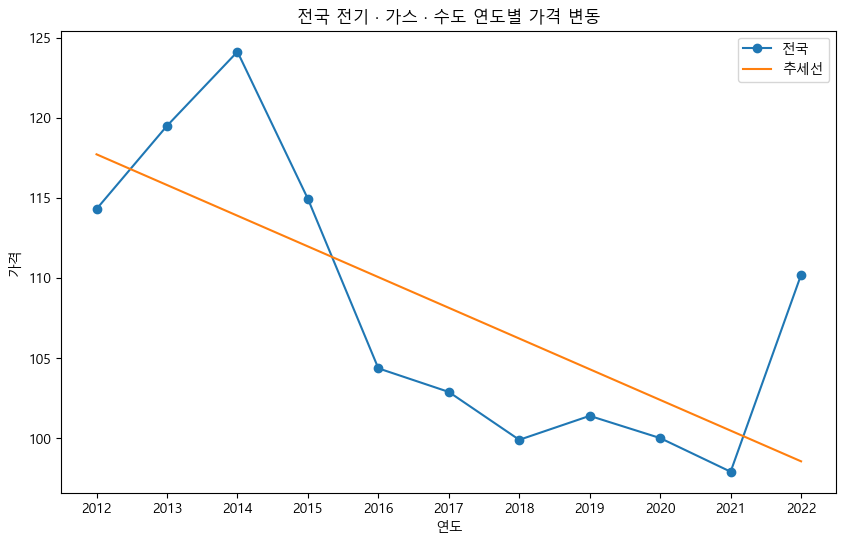

추세선 기울기: 1.226227272727273


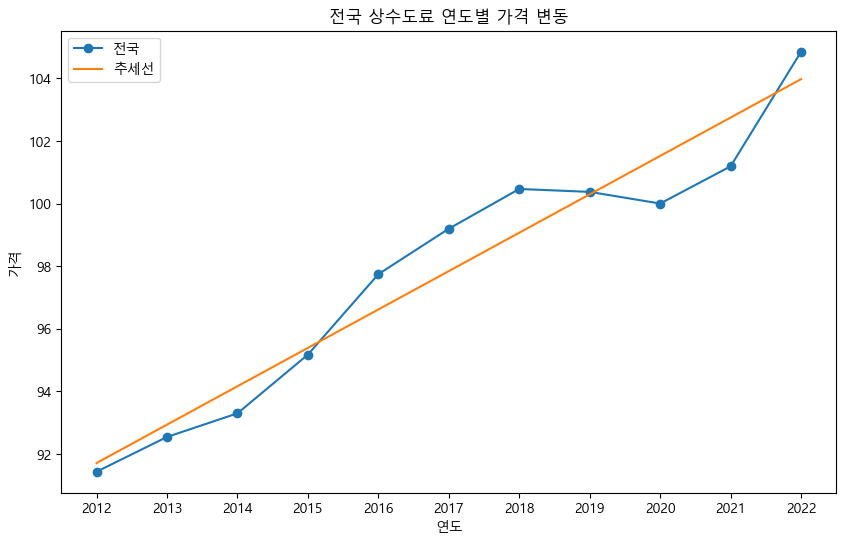

추세선 기울기: -1.1996636363636373


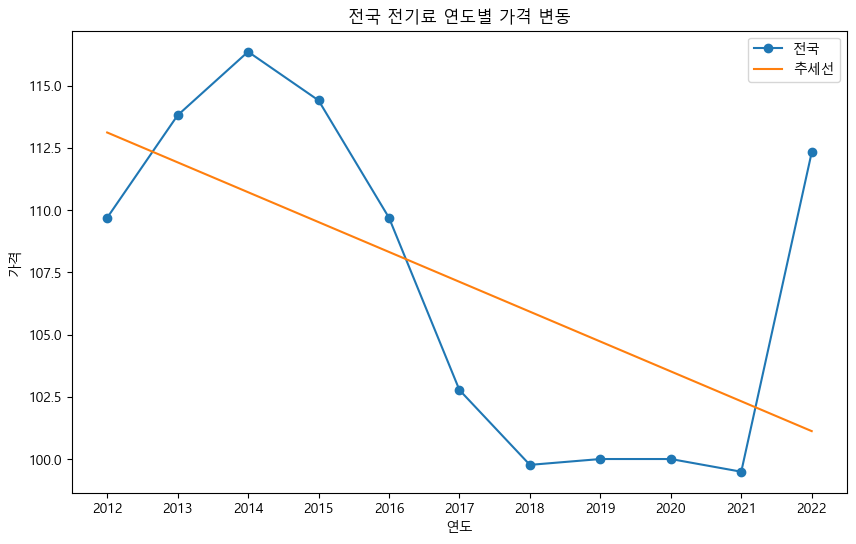

추세선 기울기: -3.966963636363638


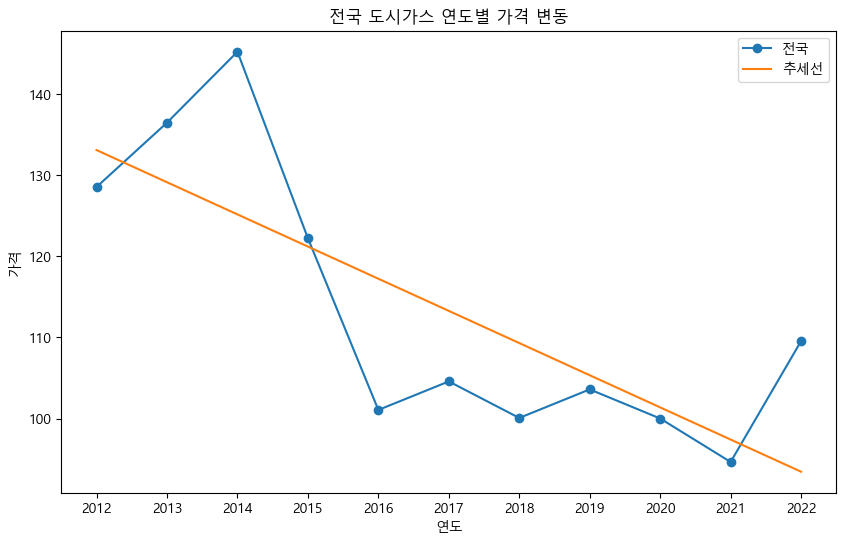

추세선 기울기: -2.1368818181818185


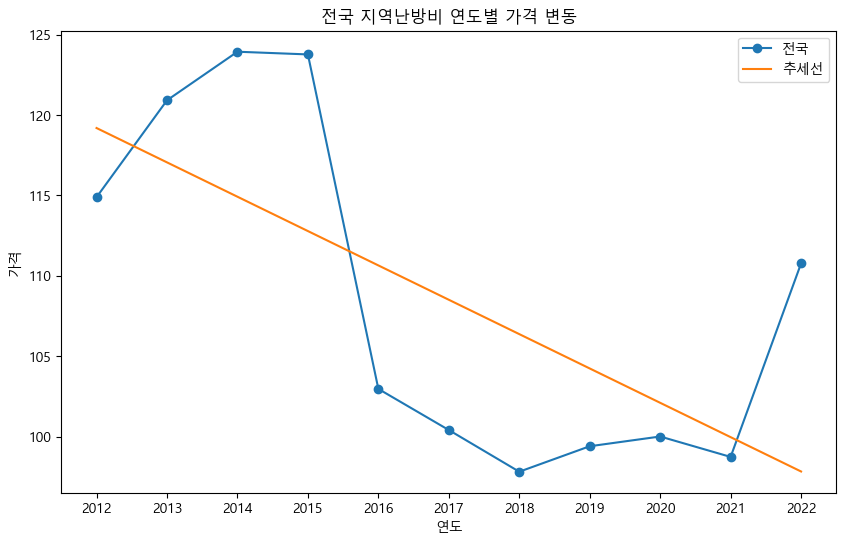

In [15]:
trend_egw = []
for j in tqdm(range(0, len(egw))):
    # 시간 경향 분석
    # 연도별 가격 변동 추이 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(df.columns[2:], df.iloc[j, 2:], marker='o', label='전국')  # 전국 데이터 시각화

    # 추세선 그리기
    X = np.arange(len(df.columns[2:])).reshape(-1, 1)
    y = df.iloc[j, 2:].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    plt.plot(df.columns[2:], reg.predict(X), label='추세선')  # 추세선 시각화

    # 추세선 기울기 출력
    slope = reg.coef_[0][0]  # 추세선의 기울기
    print(f'추세선 기울기: {slope}')
    trend_egw.append(slope)

    plt.xlabel('연도')
    plt.ylabel('가격')
    plt.title(f'전국 {item_egw[j]} 연도별 가격 변동')
    plt.legend()
    plt.show()

In [16]:
# 추세선 리스트 확인
print(trend_egw)

[-1.9163090909090914, 1.226227272727273, -1.1996636363636373, -3.966963636363638, -2.1368818181818185]


In [17]:
len(trend_egw)

5

In [18]:
egw["추세선"] = trend_egw

In [19]:
egw = egw.sort_values("추세선", ascending=False)

In [20]:
egw

,시도별,품목별,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,추세선
1,전국,상수도료,91.434,92.544,93.299,95.175,97.744,99.196,100.466,100.373,100,101.19,104.85,1.226227
2,전국,전기료,109.692,113.808,116.362,114.408,109.694,102.772,99.765,100.000,100,99.49,112.32,-1.199664
0,전국,전기 · 가스 · 수도,114.298,119.489,124.116,114.931,104.353,102.880,99.891,101.387,100,97.90,110.19,-1.916309
4,전국,지역난방비,114.888,120.916,123.939,123.771,102.961,100.403,97.809,99.394,100,98.73,110.77,-2.136882
3,전국,도시가스,128.549,136.487,145.236,122.234,101.057,104.574,100.068,103.591,100,94.64,109.55,-3.966964


In [21]:
trend_egw

[-1.9163090909090914,
 1.226227272727273,
 -1.1996636363636373,
 -3.966963636363638,
 -2.1368818181818185]

In [22]:
del egw["추세선"]

In [27]:
egw_t = egw.T

In [91]:
egw.T[1:]

,1,2,0,4,3
품목별,상수도료,전기료,전기 · 가스 · 수도,지역난방비,도시가스
2012,91.434,109.692,114.298,114.888,128.549
2013,92.544,113.808,119.489,120.916,136.487
2014,93.299,116.362,124.116,123.939,145.236
2015,95.175,114.408,114.931,123.771,122.234
2016,97.744,109.694,104.353,102.961,101.057
2017,99.196,102.772,102.88,100.403,104.574
2018,100.466,99.765,99.891,97.809,100.068
2019,100.373,100.0,101.387,99.394,103.591
2020,100,100,100,100,100


In [86]:
# del egw_t[0]
# del egw_t[1]
# del egw_t[2]
# del egw_t[3]
# del egw_t[4]

In [87]:
egw_t

""
시도별
품목별
2012
2013
2014
2015
2016
2017
2018
2019


In [ ]:
# 연도별 합계출산율과 비교해보자!


## 집세

In [48]:
house = pd.read_excel("C:\\juna27\\Git\\data\\data1\\품목별_소비자물가지수_품목성질별_2020100__20230425131246(집세).xlsx")

C:\Users\acorn\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [49]:
house["시도별"]

0    전국
1    전국
2    전국
3    전국
Name: 시도별, dtype: object

In [50]:
house

,시도별,품목별,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,전국,집세,89.014,91.383,93.527,95.907,97.694,99.271,99.885,99.783,100,101.38,103.26
1,전국,집세,89.014,91.383,93.527,95.907,97.694,99.271,99.885,99.783,100,101.38,103.26
2,전국,전세,83.918,86.570,89.192,92.425,95.357,98.103,99.513,99.693,100,101.92,104.56
3,전국,월세,97.224,98.834,99.779,100.073,100.444,100.582,100.302,99.884,100,100.73,101.68


In [51]:
house = house.dropna()

In [52]:
house

,시도별,품목별,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,전국,집세,89.014,91.383,93.527,95.907,97.694,99.271,99.885,99.783,100,101.38,103.26
1,전국,집세,89.014,91.383,93.527,95.907,97.694,99.271,99.885,99.783,100,101.38,103.26
2,전국,전세,83.918,86.570,89.192,92.425,95.357,98.103,99.513,99.693,100,101.92,104.56
3,전국,월세,97.224,98.834,99.779,100.073,100.444,100.582,100.302,99.884,100,100.73,101.68


In [53]:
len(house)

4

In [54]:
house["품목별"]

0          집세
1       　　　집세
2    　　　　　　전세
3    　　　　　　월세
Name: 품목별, dtype: object

In [55]:
items_house = []

for i in house["품목별"]:
    items_house.append(i)

In [56]:
# items

In [57]:
item_house = [i.replace('\u3000', '') for i in items_house]

In [58]:
item_house

['집세', '집세', '전세', '월세']

In [59]:
len(item_house)

4

In [60]:
df = house.dropna()

  0%|          | 0/4 [00:00<?, ?it/s]

추세선 기울기: 1.2780000000000011


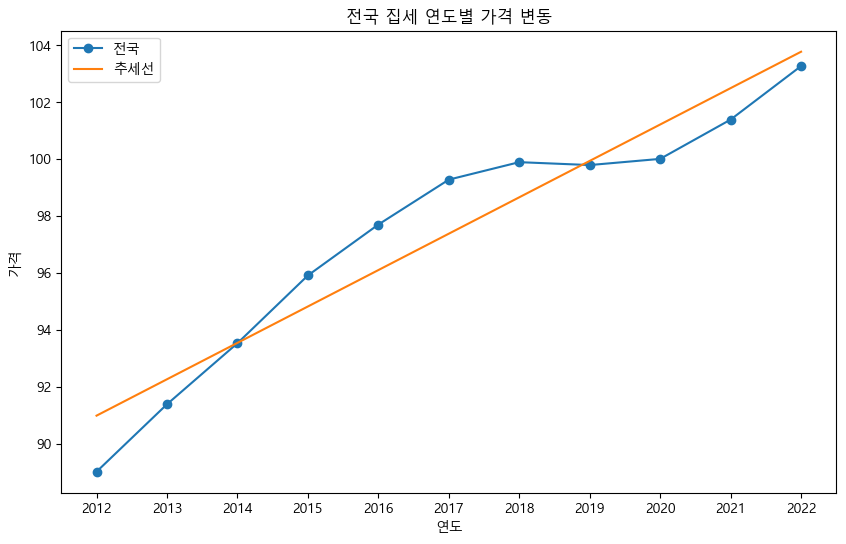

추세선 기울기: 1.2780000000000011


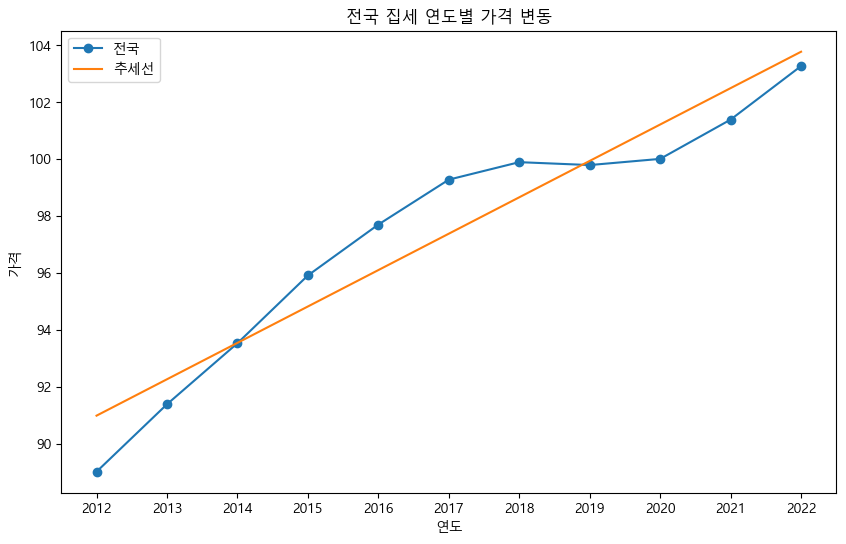

추세선 기울기: 1.9611454545454554


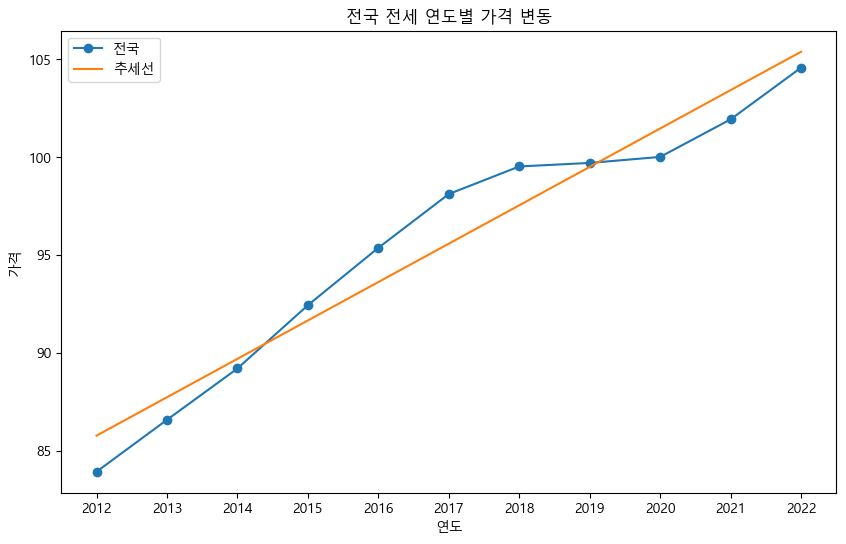

추세선 기울기: 0.2727909090909096


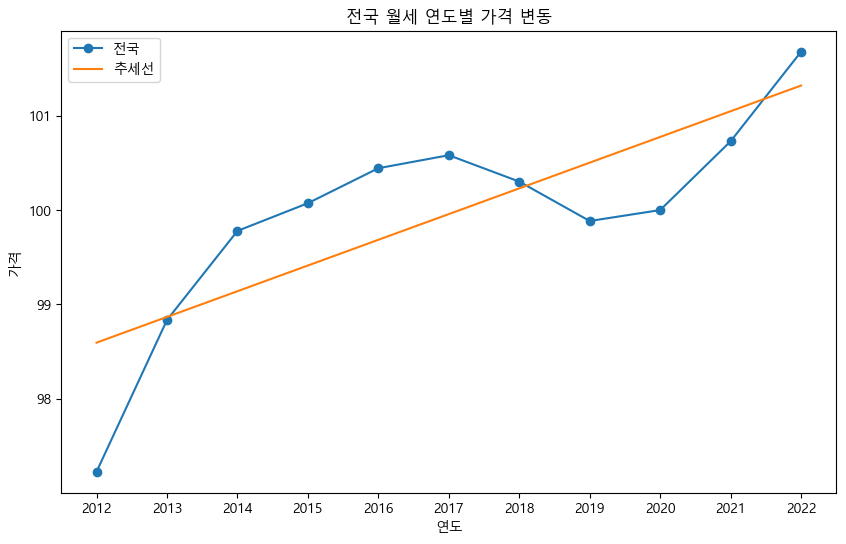

In [61]:
trend_house = []
for j in tqdm(range(0, len(house))):
    # 시간 경향 분석
    # 연도별 가격 변동 추이 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(df.columns[2:], df.iloc[j, 2:], marker='o', label='전국')  # 전국 데이터 시각화

    # 추세선 그리기
    X = np.arange(len(df.columns[2:])).reshape(-1, 1)
    y = df.iloc[j, 2:].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    plt.plot(df.columns[2:], reg.predict(X), label='추세선')  # 추세선 시각화

    # 추세선 기울기 출력
    slope = reg.coef_[0][0]  # 추세선의 기울기
    print(f'추세선 기울기: {slope}')
    trend_house.append(slope)

    plt.xlabel('연도')
    plt.ylabel('가격')
    plt.title(f'전국 {item_house[j]} 연도별 가격 변동')
    plt.legend()
    plt.show()

In [63]:
# 추세선 리스트 확인
print(trend_house)

[1.2780000000000011, 1.2780000000000011, 1.9611454545454554, 0.2727909090909096]


In [64]:
len(trend_house)

4

In [65]:
house["추세선"] = trend_house

In [66]:
house = house.sort_values("추세선", ascending=False)

In [67]:
house

,시도별,품목별,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,추세선
2,전국,전세,83.918,86.570,89.192,92.425,95.357,98.103,99.513,99.693,100,101.92,104.56,1.961145
0,전국,집세,89.014,91.383,93.527,95.907,97.694,99.271,99.885,99.783,100,101.38,103.26,1.278000
1,전국,집세,89.014,91.383,93.527,95.907,97.694,99.271,99.885,99.783,100,101.38,103.26,1.278000
3,전국,월세,97.224,98.834,99.779,100.073,100.444,100.582,100.302,99.884,100,100.73,101.68,0.272791


In [68]:
trend_house

[1.2780000000000011,
 1.2780000000000011,
 1.9611454545454554,
 0.2727909090909096]

In [69]:
del house["추세선"]

In [82]:
house_t = house.T

In [83]:
house.T[1:]

,2,0,1,3
품목별,전세,집세,집세,월세
2012,83.918,89.014,89.014,97.224
2013,86.57,91.383,91.383,98.834
2014,89.192,93.527,93.527,99.779
2015,92.425,95.907,95.907,100.073
2016,95.357,97.694,97.694,100.444
2017,98.103,99.271,99.271,100.582
2018,99.513,99.885,99.885,100.302
2019,99.693,99.783,99.783,99.884
2020,100,100,100,100


In [84]:
# del house_t[0]
# del house_t[1]
# del house_t[2]
# del house_t[3]
# del house_t[4]

In [85]:
house_t

""
시도별
품목별
2012
2013
2014
2015
2016
2017
2018
2019
